# Telecom users 
Any business wants to maximize the number of customers. To achieve this goal, it is important not only to try to attract new ones, but also to retain existing ones. Retaining a client will cost the company less than attracting a new one. In addition, a new client may be weakly interested in business services and it will be difficult to work with him, while old clients already have the necessary data on interaction with the service.

Accordingly, predicting the churn, we can react in time and try to keep the client who wants to leave. Based on the data about the services that the client uses, we can make him a special offer, trying to change his decision to leave the operator. This will make the task of retention easier to implement than the task of attracting new users, about which we do not know anything yet.

You are provided with a dataset from a telecommunications company. The data contains information about almost six thousand users, their demographic characteristics, the services they use, the duration of using the operator's services, the method of payment, and the amount of payment.

The task is to analyze the data and predict the churn of users (to identify people who will and will not renew their contract). The work should include the following mandatory items:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/Deepthi/Desktop/srikar/telecom_users.csv")

In [3]:
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [4]:
df.isnull().sum()

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.describe()

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges
count,5986.000000,5986.000000,5986.000000,5986.000000
mean,3533.561310,0.161377,32.468760,64.802213
std,2035.705666,0.367909,24.516391,30.114702
min,0.000000,0.000000,0.000000,18.250000
25%,1777.250000,0.000000,9.000000,35.650000
50%,3546.500000,0.000000,29.000000,70.400000
75%,5291.750000,0.000000,56.000000,89.900000
max,7042.000000,1.000000,72.000000,118.750000


In [6]:
df.corr()

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges
Unnamed: 0,1.000000,-0.000331,0.009620,-0.009830
SeniorCitizen,-0.000331,1.000000,0.005468,0.219387
tenure,0.009620,0.005468,1.000000,0.256983
MonthlyCharges,-0.009830,0.219387,0.256983,1.000000


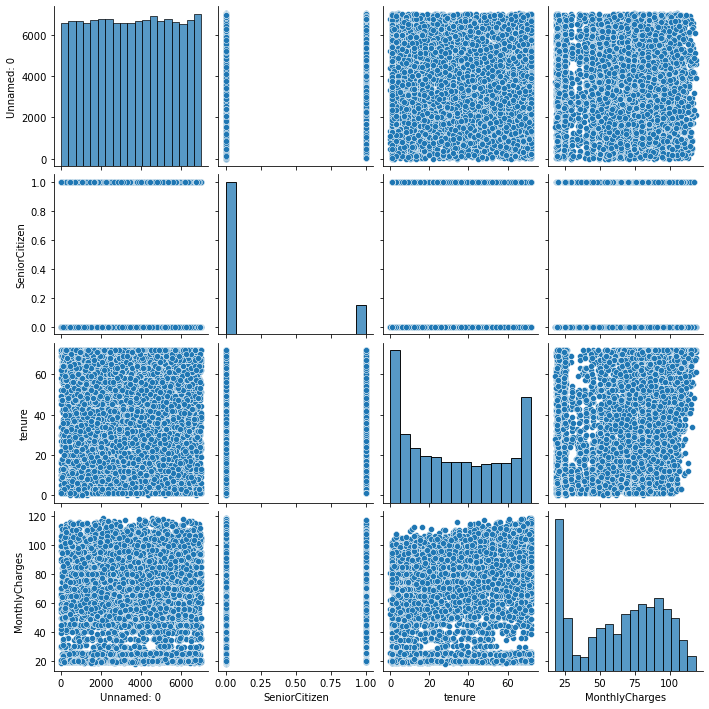

In [7]:
import seaborn as sns
sns.pairplot(df.iloc[:,:-1])

<AxesSubplot:>

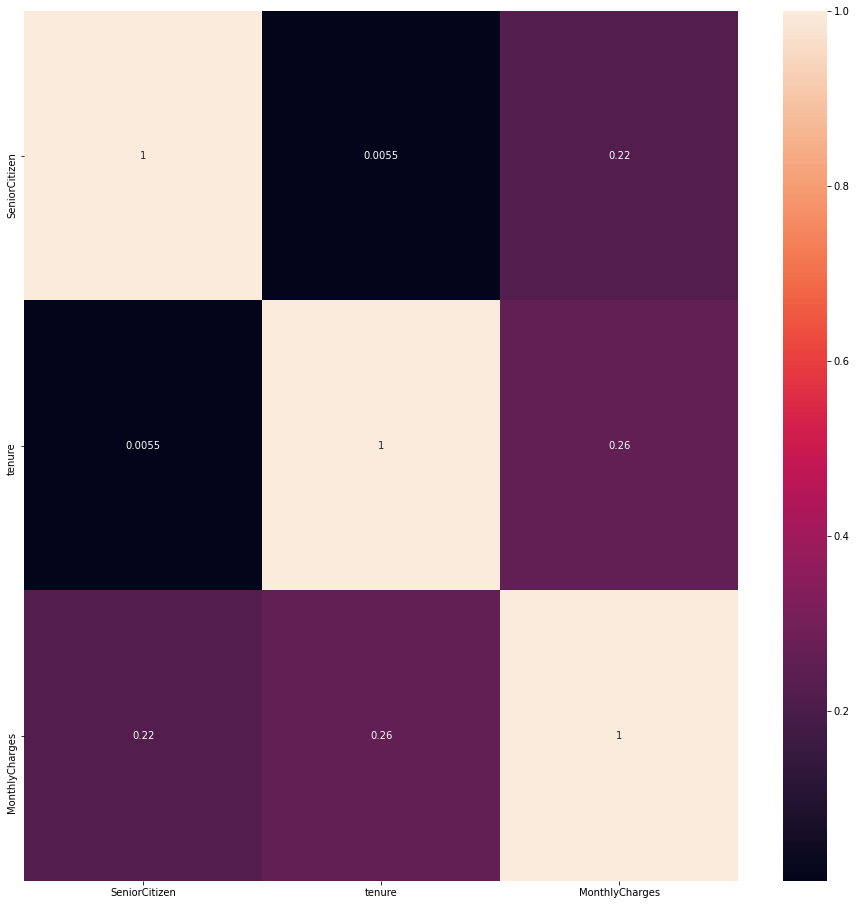

In [13]:
plt.figure(figsize=(16,16))
df_corr = df.corr()
df_features = df_corr.index
sns.heatmap(df[df_features].corr(),annot=True)

In [14]:
df['Churn'].value_counts()

No     4399
Yes    1587
Name: Churn, dtype: int64

In [8]:
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [9]:
df['Unnamed: 0'].values

array([1869, 4528, 6344, ..., 5226, 5390,  860], dtype=int64)

In [10]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [11]:
df_new = pd.get_dummies(df,drop_first=True)

In [12]:
df_new.head()

,SeniorCitizen,tenure,MonthlyCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,customerID_0014-BMAQU,...,TotalCharges_994.55,TotalCharges_994.8,TotalCharges_995.35,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,Churn_Yes
0,0,72,24.10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,44,88.15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,38,74.95,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,4,55.90,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,53.45,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
x=df_new.drop('Churn_Yes',axis=1).values
y=df_new['Churn_Yes'].values

In [16]:
x

array([[ 0.  , 72.  , 24.1 , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  , 44.  , 88.15, ...,  0.  ,  0.  ,  0.  ],
       [ 1.  , 38.  , 74.95, ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.  , 12.  , 21.15, ...,  0.  ,  0.  ,  0.  ],
       [ 1.  , 12.  , 99.45, ...,  0.  ,  0.  ,  0.  ],
       [ 0.  , 26.  , 19.8 , ...,  0.  ,  0.  ,  0.  ]])

In [17]:
y

array([0, 0, 1, ..., 0, 1, 0], dtype=uint8)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
model=DecisionTreeClassifier(criterion='entropy',max_depth = 3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [22]:
model.score(x_train,y_train)

0.7596658711217184

In [23]:
model.score(x_test,y_test)

0.7611358574610245